**Importing required Packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Importing Dataset and read the first 5 values:**

In [2]:
dataset = pd.read_csv('winequalityN.csv')
print(dataset.head(5))

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

**Correlation Map:**

<ipython-input-8-1d3d45336697>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataset.corr(),cmap = 'BrBG',


<Axes: >

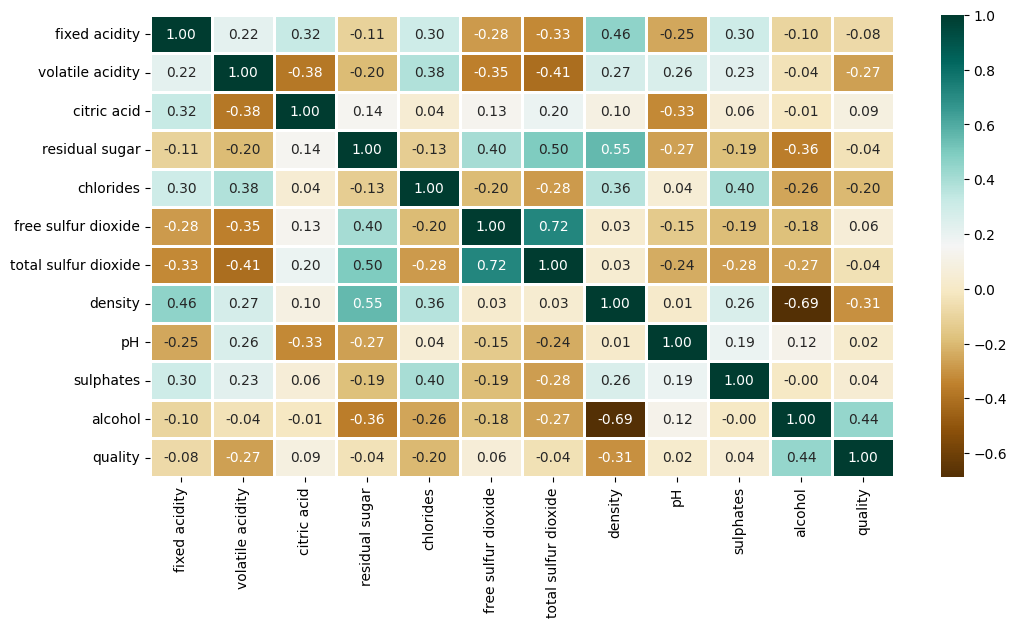

In [8]:
plt.figure(figsize=(12, 6))
sb.heatmap(dataset.corr(),cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

In [12]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 1
Float variables: 11


**Data Cleaning:**

In [13]:
dataset['quality'] = dataset['quality'].fillna(
dataset['quality'].mean())

new_dataset = dataset.dropna()

new_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Histogram representation of all Numerical Features:**

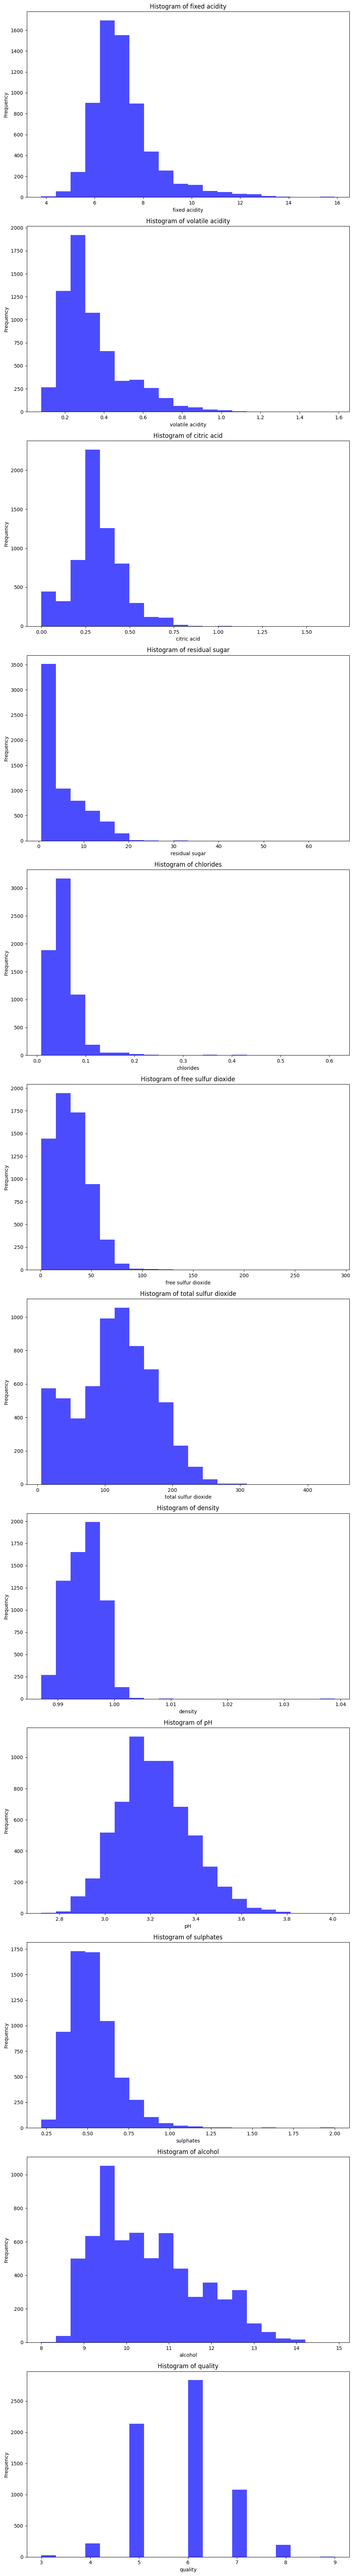

In [18]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64'])
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(10, 6 * len(numerical_columns.columns)))
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i]
    ax.hist(numerical_columns[column], bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


**Applying One-Hot Encoder for Categorical features:**

In [14]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

**Data Spliting:**

In [15]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['quality'], axis=1)
Y = df_final['quality']

X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

**Selecting Model and Model Evaluation:**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("R2 Score:",r2_score(Y_valid, Y_pred))
print("Mean absolute percentage error:",mean_absolute_percentage_error(Y_valid, Y_pred))

R2 Score: 0.28320136545868957
Mean absolute percentage error: 0.10042265934632905


**Visualization:**

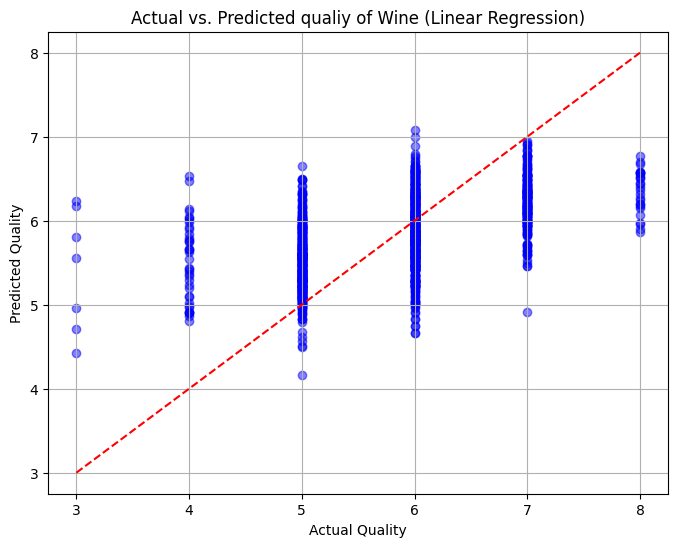

In [17]:
import matplotlib.pyplot as plt

# Creating a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted qualiy of Wine (Linear Regression)')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(Y_valid), max(Y_valid)], [min(Y_valid), max(Y_valid)], color='red', linestyle='--')

plt.show()